In [1]:
import os.path
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import experimental
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

2023-12-21 16:55:23.626894: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 16:55:23.626926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 16:55:23.627463: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 16:55:23.630867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-21 16:55:24.121990: W tensorflow/compiler/tf2

In [2]:
data_path = Path("data")
img_path = list(data_path.glob(r"*/*.jpg"))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],img_path))
img_pathes = pd.Series(img_path, name="img").astype(str)
labels = pd.Series(labels, name="label")

data_df = pd.concat([img_pathes, labels], axis=1)
data_df

,img,label
0,data/Fresh/test_20171016_104321D.jpg,Fresh
1,data/Fresh/test_20171016_104521D.jpg,Fresh
2,data/Fresh/test_20171016_104721D.jpg,Fresh
3,data/Fresh/test_20171016_104921D.jpg,Fresh
4,data/Fresh/test_20171016_105121D.jpg,Fresh
...,...,...
1891,data/Spoiled/test_20171019_025721D.jpg,Spoiled
1892,data/Spoiled/test_20171019_025921D.jpg,Spoiled
1893,data/Spoiled/test_20171019_030121D.jpg,Spoiled
1894,data/Spoiled/test_20171019_030721D.jpg,Spoiled


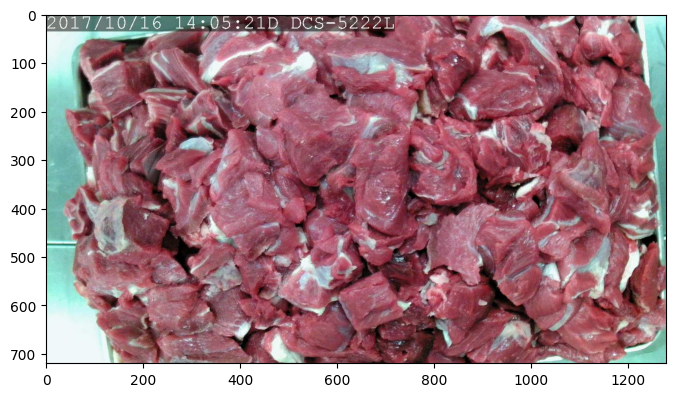

In [3]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(data_df[data_df["label"] == "Fresh"]["img"][99]))
plt.show()

In [4]:
train, test = train_test_split(data_df, test_size=0.2)

In [5]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = data_gen.flow_from_dataframe(dataframe=train,
                                               x_col="img",
                                               y_col="label",
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="training")

val_Gen = data_gen.flow_from_dataframe(dataframe=train,
                                               x_col="img",
                                               y_col="label",
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="validation")

test_gen = data_gen.flow_from_dataframe(dataframe=test,
                                               x_col="img",
                                               y_col="label",
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32)

num_train_samples = train_gen.n
print(f"Число образцов в обучающей выборке: {num_train_samples}")
num_val_samples = val_Gen.n
print(f"Число образцов в валидационной выборке: {num_val_samples}")
num_test_samples = test_gen.n
print(f"Число образцов в тестовой выборке: {num_test_samples}")

Found 1213 validated image filenames belonging to 2 classes.
Found 303 validated image filenames belonging to 2 classes.
Found 380 validated image filenames belonging to 2 classes.
Число образцов в обучающей выборке: 1213
Число образцов в валидационной выборке: 303
Число образцов в тестовой выборке: 380


In [6]:
batch_size = 4
epochs = 15
img_size = 150

model = Sequential([
  experimental.preprocessing.Rescaling(1./255),
  Flatten(input_shape=(img_size, img_size)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(2, activation="softmax")
])


model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model.fit(train_gen,
          validation_data=val_Gen,
          epochs=epochs,
          batch_size=batch_size)

results = model.evaluate(test_gen)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

2023-12-21 16:55:26.671471: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-21 16:55:26.693332: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-21 16:55:26.693374: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-21 16:55:26.696473: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-21 16:55:26.696521: I external/local_xla/xla/stream_executor

Epoch 1/15


2023-12-21 16:55:27.242857: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 1/38 [..............................] - ETA: 42s - loss: 0.6930 - accuracy: 0.6250

2023-12-21 16:55:28.269621: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f4b70a110d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-21 16:55:28.269650: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2023-12-21 16:55:28.272444: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-21 16:55:28.281278: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1703159728.304695    7357 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


38/38 [==============================] - 8s 179ms/step - loss: 0.6750 - accuracy: 0.5936 - val_loss: 0.6134 - val_accuracy: 0.9340
Epoch 2/15
38/38 [==============================] - 7s 176ms/step - loss: 0.5229 - accuracy: 0.8203 - val_loss: 0.3370 - val_accuracy: 0.9274
Epoch 3/15
38/38 [==============================] - 6s 169ms/step - loss: 0.3230 - accuracy: 0.8813 - val_loss: 0.2902 - val_accuracy: 0.9274
Epoch 4/15
38/38 [==============================] - 7s 178ms/step - loss: 0.2284 - accuracy: 0.9184 - val_loss: 0.1324 - val_accuracy: 0.9505
Epoch 5/15
38/38 [==============================] - 7s 180ms/step - loss: 0.1853 - accuracy: 0.9258 - val_loss: 0.1386 - val_accuracy: 0.9340
Epoch 6/15
38/38 [==============================] - 7s 178ms/step - loss: 0.1476 - accuracy: 0.9448 - val_loss: 0.1430 - val_accuracy: 0.9307
Epoch 7/15
38/38 [==============================] - 7s 186ms/step - loss: 0.1418 - accuracy: 0.9464 - val_loss: 0.0901 - val_accuracy: 0.9868
Epoch 8/15
38/38 

In [7]:
model.save('model/my_model')

1/1 [==============================] - 0s 50ms/step
Испорченное мясо


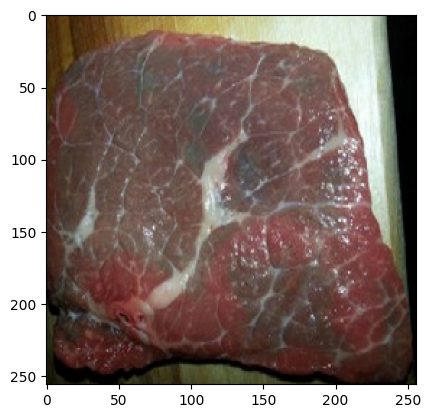

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np


def predict(model, img):
    # Загрузка сохраненной модели
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Нормализация
    plt.imshow(img_array[0])
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    if predicted_class == 0:
        print("Свежее мясо")
    else:
        print("Испорченное мясо")
            

loaded_model = load_model('model/my_model')
image_path = f"data/test1.jpg"

img = image.load_img(image_path, target_size=(256, 256))
predict(loaded_model, img)

1/1 [==============================] - 0s 11ms/step
Свежее мясо


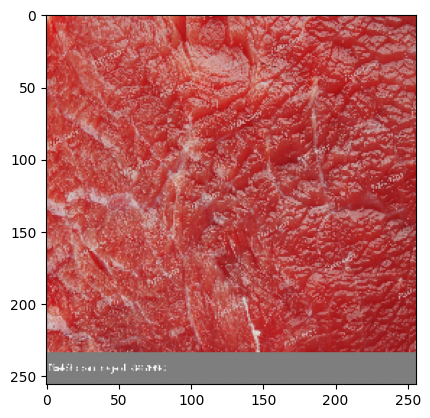

In [9]:
image_path = f"data/test2.jpg"

img = image.load_img(image_path, target_size=(256, 256))
predict(loaded_model, img)